# CLIP_seg_for_image_segmentation
This model is a little different from the rest we have encountered so far. In a nutshell, the logits in this models have a lesser number of dimensions. It also uses a different method segmentation. The differences have been pointed out as and when they occur.

In [5]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
# from wrapper import logit_image
import matplotlib.pylab as plt
import numpy as np
import cv2

In [6]:
processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
# image_path = 'Images/trump.png'
image_path = 'Images/AA_Chameleon.jpg'
image = Image.open(image_path).convert("RGB")
image_path_GT = 'Images/trump_GT.png'
ground_truth = Image.open(image_path_GT).convert("RGB")

### Difference
This model will produce a different output every time you change the texts you give it in the next cell. Initially texts was ["a cat", "a remote", "a dog"] and it produced a blank purple image. On changing it to its current state, I got a vertical gradient. 
##### Question?
Is it because of the lesser dimesnions?

In [7]:
# texts = ["a bulding", "a bridge", "trump"]
texts = ["a chameleon", "animal", "green"]
inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

#### Why didn't I call the wrapper function?
Because that won't work on this model because of the lesser number of dimensions. On changing that to cater to 3 dimensions, it worked.

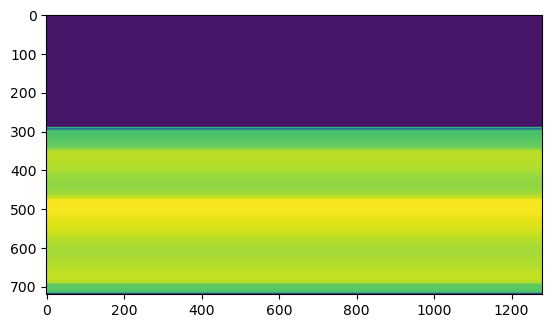

In [8]:
logits_mask = np.zeros(list(logits.shape[2:4]))
for label in range(logits.shape[1]):
    thislabel = logits[0,label,:].detach().numpy() #changes made here
    logits_mask[thislabel > 0] = label
mask = cv2.resize(logits_mask, dsize=image.size, interpolation=cv2.INTER_CUBIC)
plt.imshow(mask)